In [8]:
import kagglehub
import pandas

path = kagglehub.dataset_download("amar5693/screen-time-sleep-and-stress-analysis-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\PC\.cache\kagglehub\datasets\amar5693\screen-time-sleep-and-stress-analysis-dataset\versions\1


In [31]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
path = Path(path) / Path("Smartphone_Usage_Productivity_Dataset_50000.csv")
data = pd.read_csv(path)
data.head()

,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
0,U1,58,Male,Professional,Android,1.3,6.7,6,8.8,4,42,1,8.7
1,U2,25,Male,Professional,Android,1.2,1.5,5,6.4,1,51,3,5.1
2,U3,19,Male,Student,iOS,5.3,5.7,5,9.0,4,14,5,6.3
3,U4,35,Female,Business Owner,iOS,5.8,2.5,2,5.7,3,36,6,12.8
4,U5,33,Male,Freelancer,Android,7.9,1.3,4,5.7,3,37,5,9.9


# EDA

First, we must understand the dataset. We can start by looking at its structure for features and identifying the target variable.

In [11]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    50000 non-null  str    
 1   Age                        50000 non-null  int64  
 2   Gender                     50000 non-null  str    
 3   Occupation                 50000 non-null  str    
 4   Device_Type                50000 non-null  str    
 5   Daily_Phone_Hours          50000 non-null  float64
 6   Social_Media_Hours         50000 non-null  float64
 7   Work_Productivity_Score    50000 non-null  int64  
 8   Sleep_Hours                50000 non-null  float64
 9   Stress_Level               50000 non-null  int64  
 10  App_Usage_Count            50000 non-null  int64  
 11  Caffeine_Intake_Cups       50000 non-null  int64  
 12  Weekend_Screen_Time_Hours  50000 non-null  float64
dtypes: float64(4), int64(5), str(4)
memory usage: 5.0 MB


There are 50,000 entries in this dataset. All columns have fully populated values, so we can expect no missing values. This is corroborated below.

In [13]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Device_Type                  0
Daily_Phone_Hours            0
Social_Media_Hours           0
Work_Productivity_Score      0
Sleep_Hours                  0
Stress_Level                 0
App_Usage_Count              0
Caffeine_Intake_Cups         0
Weekend_Screen_Time_Hours    0
dtype: int64


In this case, the project at hand is looking to predict the `Stress Level` of a user.

The following is a list of columns and their descriptions, according to the dataset description in [Kaggle](https://www.kaggle.com/datasets/amar5693/screen-time-sleep-and-stress-analysis-dataset).

| #  | Variable Name             | Type             | Missing Values | Description                                       |
| -- | ------------------------- | ---------------- | -------------- | ------------------------------------------------- |
| 1  | User_ID                   | String           | No             | Unique identifier                                 |
| 2  | Age                       | Integer          | No             | User age (18–60)                                  |
| 3  | Gender                    | String           | No             | Male, Female, Other                               |
| 4  | Occupation                | String           | No             | Student, Professional, Freelancer, Business Owner |
| 5  | Device_Type               | String           | No             | Android / iOS                                     |
| 6  | Daily_Phone_Hours         | Float            | No             | Average daily phone usage                         |
| 7  | Social_Media_Hours        | Float            | No             | Daily time spent on social media                  |
| 8  | Work_Productivity_Score   | Integer          | No             | Productivity score (1–10)                         |
| 9  | Sleep_Hours               | Float            | No             | Average sleep duration                            |
| 10 | Stress_Level              | Integer          | No             | Stress rating (1–10)                              |
| 11 | App_Usage_Count           | Integer          | No             | Number of apps used daily                         |
| 12 | Caffeine_Intake_Cups      | Integer          | No             | Daily caffeine consumption                        |
| 13 | Weekend_Screen_Time_Hours | Float            | No             | Screen time during weekends                       |

## Feature variable analysis

Once we have the list of columns, we can identify the feature variables that will aid in predicting the target.

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,39.034960,12.414877,18.0,28.0,39.0,50.0,60.0
Daily_Phone_Hours,50000.0,6.509116,3.170903,1.0,3.8,6.5,9.2,12.0
Social_Media_Hours,50000.0,4.267250,2.164743,0.5,2.4,4.3,6.1,8.0
Work_Productivity_Score,50000.0,5.503760,2.874806,1.0,3.0,5.5,8.0,10.0
Sleep_Hours,50000.0,6.497744,1.449551,4.0,5.2,6.5,7.8,9.0
Stress_Level,50000.0,5.504500,2.871095,1.0,3.0,6.0,8.0,10.0
App_Usage_Count,50000.0,32.438980,16.121510,5.0,18.0,32.0,46.0,60.0
Caffeine_Intake_Cups,50000.0,3.004580,1.996657,0.0,1.0,3.0,5.0,6.0
Weekend_Screen_Time_Hours,50000.0,8.006844,3.461300,2.0,5.0,8.0,11.0,14.0


### Numerical Features

The numerical features are the following:
- `Age`
- `Daily Phone Hours`
- `Social Media Hours`
- `Work Productivity Score`
- `Sleep Hours`
- `App_Usage_Count`
- `Caffeine_Intake_Cups`
- `Weekend_Screen_Time_Hours`

Before we do anything, we can forget about `Work Productivity Score` to prevent data leakage. This producivity score is a target for a different problem, so it is essentially irrelevant to the current prediction task.

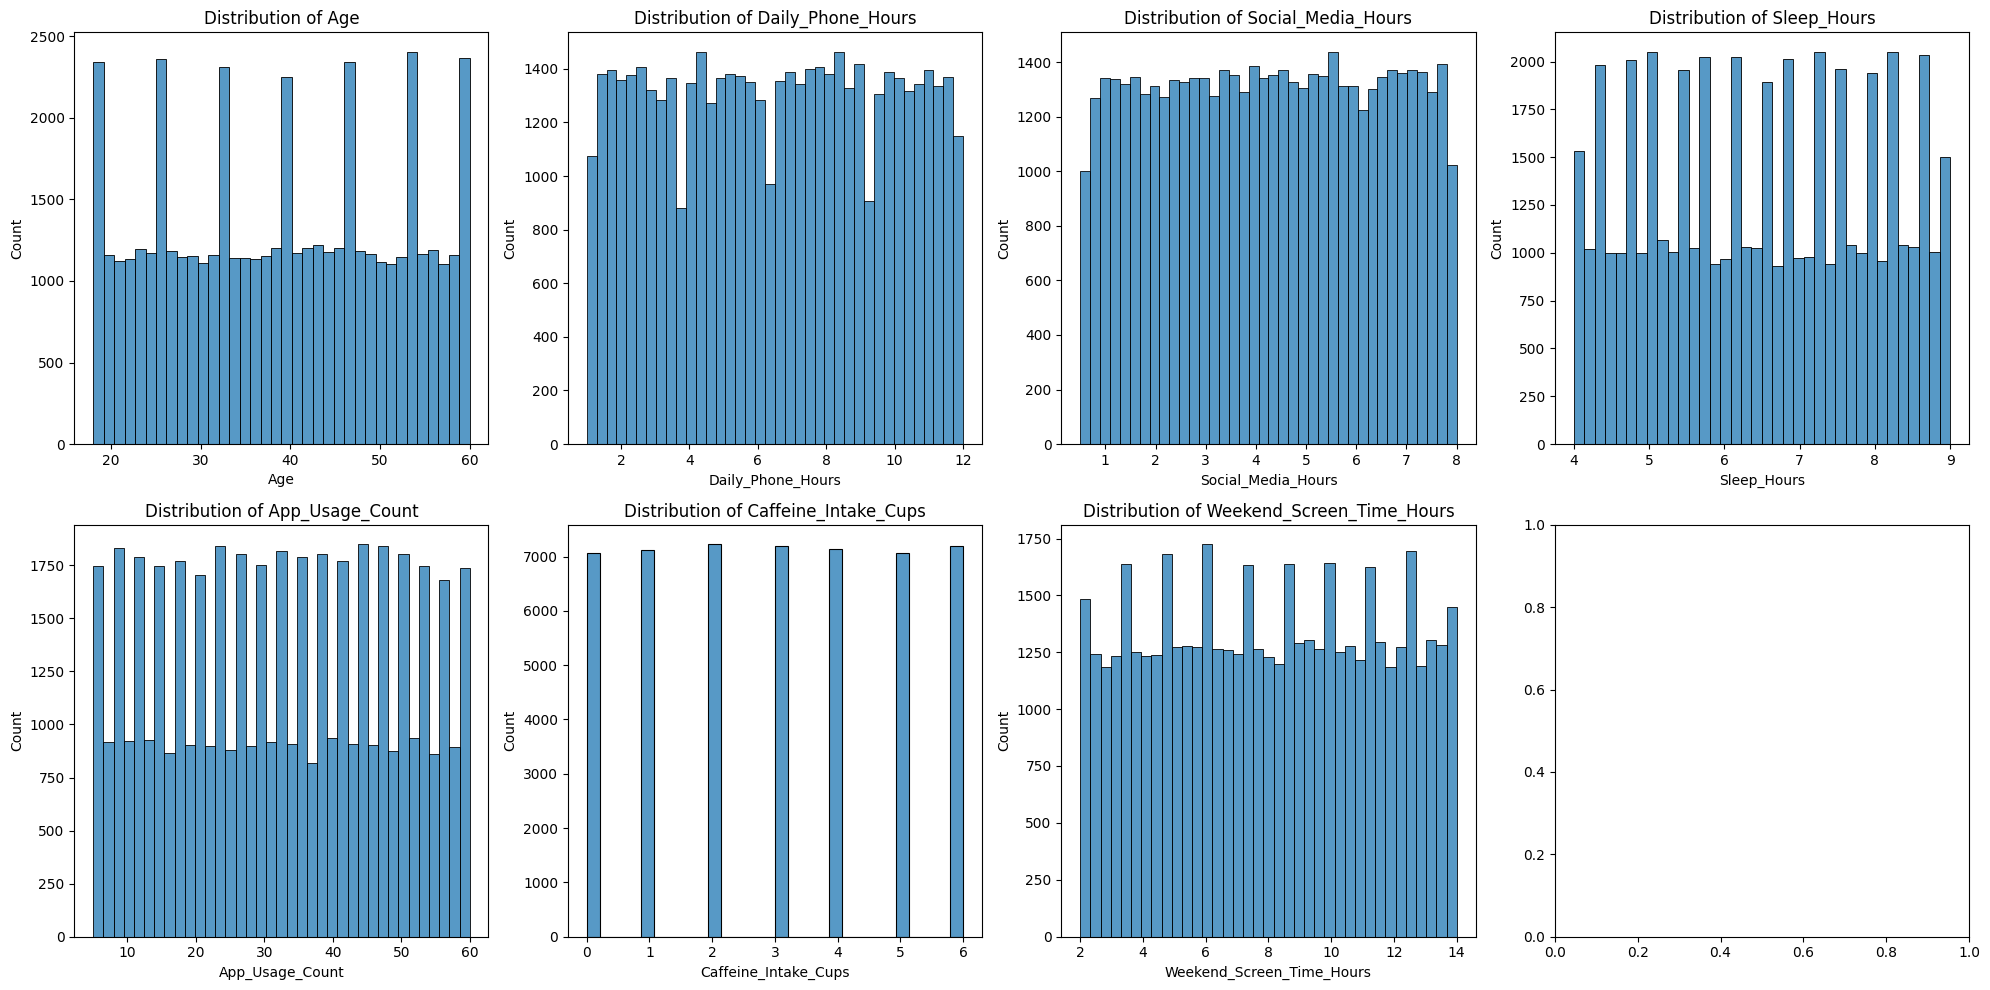

In [36]:
numerical_cols = ['Age', 'Daily_Phone_Hours', 'Social_Media_Hours', 'Sleep_Hours', 'App_Usage_Count', 'Caffeine_Intake_Cups', 'Weekend_Screen_Time_Hours']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

As we can see, 

### Categorical Features

## Target variable analysis

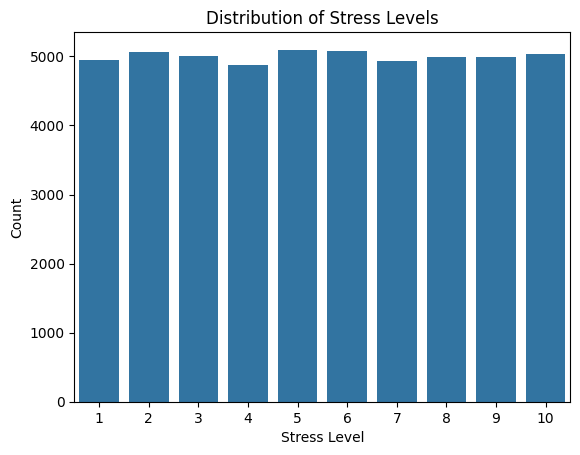

In [ ]:
ax = sns.countplot(x="Stress_Level", data=data, order=range(1, 11))
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Count")

plt.show()

As we can see, the distribution of values in `Stress Level` 